In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [ ]:
! kaggle competitions download -c plant-pathology-2020-fgvc7

100% 776M/779M [00:04<00:00, 239MB/s]
100% 779M/779M [00:04<00:00, 192MB/s]


In [ ]:
! unzip /content/plant-pathology-2020-fgvc7.zip -d dataset

In [ ]:
from __future__ import print_function
import numpy as np # For numerical fast numerical calculations
import matplotlib.pyplot as plt # For making plots
import pandas as pd # Deals with data
import seaborn as sns # Makes beautiful plots
import keras 
import sys 
from pandas import pandas as pd
import category_encoders as ce
import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os
import glob
import numpy as np
import scipy as sp
import pandas as pd
# skimage
from skimage.io import imshow, imread, imsave
from skimage.transform import rotate, AffineTransform, warp,rescale, resize, downscale_local_mean
from skimage import color,data
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
# imgaug
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
# Albumentations
import albumentations as A 
# Keras
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
#visualisation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib inline
import seaborn as sns
from IPython.display import HTML, Image
import cv2
import os
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

p_train=pd.read_csv('/content/dataset/train.csv')
p_test=pd.read_csv('/content/dataset/test.csv')

In [ ]:
! pip install --upgrade category_encoders

In [ ]:
p_train=pd.read_csv('/content/dataset/train.csv')
p_test=pd.read_csv('/content/dataset/test.csv')

target = p_train[['healthy', 'multiple_diseases', 'rust', 'scab']]
test_ids = p_test['image_id']

img_size=224

In [ ]:
p_train['image_id']

Train Shape: (1821, 224, 224, 3)
Test Shape: (1821, 224, 224, 3)


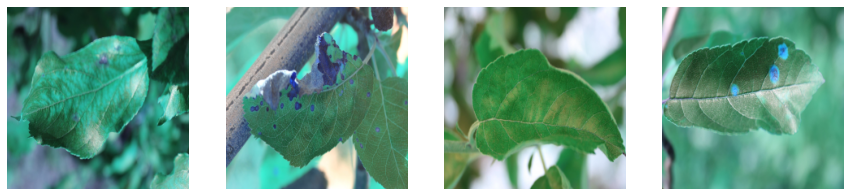

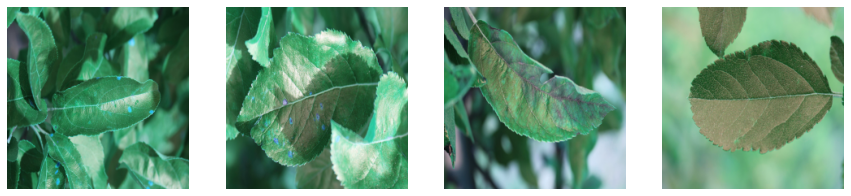

In [ ]:
train_image=[]
for name in p_train['image_id']:
    path='/content/dataset/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    train_image.append(image)

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
for i in range(4):
    ax[i].set_axis_off()
    ax[i].imshow(train_image[i])
    
    
test_image=[]
for name in p_test['image_id']:
    path='/content/dataset/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    test_image.append(image)
fig, ax = plt.subplots(1, 4, figsize=(15, 15))
for i in range(4):
    ax[i].set_axis_off()
    ax[i].imshow(test_image[i])    

from keras.preprocessing.image import img_to_array

x_train = np.ndarray(shape=(len(train_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in train_image:
    x_train[i]=img_to_array(image)
    x_train[i]=train_image[i]
    i=i+1
x_train=x_train/255
print('Train Shape: {}'.format(x_train.shape))

x_test = np.ndarray(shape=(len(test_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in test_image:
    x_test[i]=img_to_array(image)
    x_test[i]=test_image[i]
    i=i+1
    
x_test=x_test/255
print('Test Shape: {}'.format(x_test.shape))

In [ ]:
y = p_train.copy()
del y['image_id']
y.head()

y_train = np.array(y.values)
print(y_train.shape,y_train[0])

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=115)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

(1821, 4) [0 0 0 1]


((1456, 224, 224, 3), (365, 224, 224, 3), (1456, 4), (365, 4))

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 115) 
 
x_train, y_train = sm.fit_resample(x_train.reshape((-1, img_size * img_size * 3)), y_train)
x_train = x_train.reshape((-1, img_size, img_size, 3))
x_train.shape, y_train.sum(axis=0)

((2004, 224, 224, 3), array([501, 501, 501, 501]))

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
LR_reduce=ReduceLROnPlateau(monitor='val_accuracy',
                            factor=.5,
                            patience=10,
                            min_lr=.000001,
                            verbose=1)

ES_monitor=EarlyStopping(monitor='val_loss',
                          patience=20)

reg = .0005

In [ ]:
from keras.models import Model, Sequential, load_model, Input
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from keras.regularizers import l2
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras import optimizers

model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5),activation='relu', input_shape=(img_size, img_size, 3), kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(128, kernel_size=(5,5),activation='relu', kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))

model.add(Conv2D(32, kernel_size=(3,3),activation='relu', kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))


model.add(Conv2D(128, kernel_size=(5,5),activation='relu', kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(512, kernel_size=(5,5),activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))

model.add(Conv2D(128, kernel_size=(3,3),activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(512, kernel_size=(3,3),activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Dropout(.25))
model.add(Dense(200,activation='relu'))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Dropout(.25))
model.add(Dense(100,activation='relu'))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Dropout(.25))
model.add(Dense(4,activation='softmax'))

model.summary()

from keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 32)     96        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 128)     102528    
                                                                 
 batch_normalization_1 (Batc  (None, 216, 216, 128)    384       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 108, 128)    0         
 )                                                               
                                                        

In [ ]:
import tensorflow as tf

check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/plant.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=24),
                              epochs=150,
                              steps_per_epoch=x_train.shape[0] // 24,
                              verbose=1,
                              callbacks=[ES_monitor,LR_reduce, check_point],
                              validation_data=datagen.flow(x_val, y_val,batch_size=24),
                              validation_steps=x_val.shape[0]//24
                              )

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


83/83 [==============================] - ETA: 0s - loss: 0.9888 - accuracy: 0.5843
Epoch 1: val_loss did not improve from 1.27427
83/83 [==============================] - 79s 960ms/step - loss: 0.9888 - accuracy: 0.5843 - val_loss: 1.3187 - val_accuracy: 0.4833 - lr: 5.0000e-04
Epoch 2/150
83/83 [==============================] - ETA: 0s - loss: 0.8699 - accuracy: 0.6530
Epoch 2: val_loss did not improve from 1.27427
83/83 [==============================] - 79s 955ms/step - loss: 0.8699 - accuracy: 0.6530 - val_loss: 1.3133 - val_accuracy: 0.4639 - lr: 5.0000e-04
Epoch 3/150
83/83 [==============================] - ETA: 0s - loss: 0.7933 - accuracy: 0.6864
Epoch 3: val_loss improved from 1.27427 to 0.90854, saving model to /content/plant.h5
83/83 [==============================] - 80s 961ms/step - loss: 0.7933 - accuracy: 0.6864 - val_loss: 0.9085 - val_accuracy: 0.6778 - lr: 5.0000e-04
Epoch 4/150
83/83 [==============================] - ETA: 0s - loss: 0.6776 - accuracy: 0.7657
Epoch

In [ ]:
print()